In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

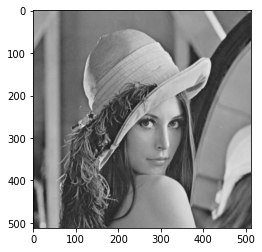

In [2]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

In [3]:
oct_kernel = [(-2, -1), (-2, 0), (-2, 1),
              (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2),
              (0, -2), (0, -1), (0, 0), (0, 1), (0, 2),
              (1, -2), (1, -1), (1, 0), (1, 1), (1, 2),
              (2, -1), (2, 0), (2, 1)]

True

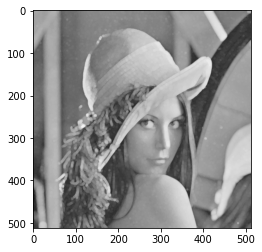

In [5]:
def dilation(lena, kernel):
    after = copy.deepcopy(lena)
    for r in range(lena.shape[0]):
        for c in range(lena.shape[1]):
            neigh = []
            for k in kernel:
                if (r - k[0] >= 0 and r - k[0] < lena.shape[0] and 
                    c - k[1] >= 0 and c - k[1] < lena.shape[1]):
                    neigh.append(lena[r - k[0]][c - k[1]])
            after[r][c] = np.max(neigh)
    return after
dina = dilation(lena, oct_kernel)
plt.imshow(dina, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('dilation-lena.bmp',dina)
cv2.imwrite('dilation-lena.png',dina)

True

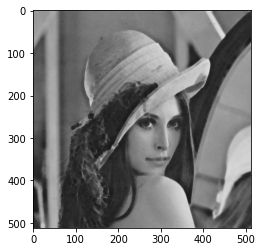

In [6]:
def erosion(lena, kernel):
    after = copy.deepcopy(lena)
    for r in range(lena.shape[0]):
        for c in range(lena.shape[1]):
            neigh = []
            for k in kernel:
                if (r + k[0] >= 0 and r + k[0] < lena.shape[0] and 
                    c + k[1] >= 0 and c + k[1] < lena.shape[1]):
                    neigh.append(lena[r + k[0]][c + k[1]])
            after[r][c] = np.min(neigh)
    return after
dina = erosion(lena, oct_kernel)
plt.imshow(dina, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('erosion-lena.bmp',dina)
cv2.imwrite('erosion-lena.png',dina)

True

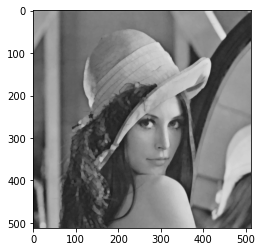

In [7]:
def opening(lena, kernel):
    return dilation(erosion(lena, kernel), kernel)
opna = opening(lena, oct_kernel)
plt.imshow(opna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('opening-lena.bmp',opna)
cv2.imwrite('opening-lena.png',opna)

True

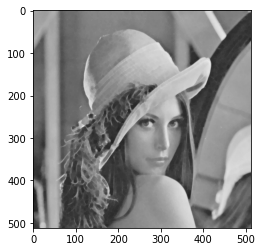

In [8]:
def closing(lena, kernel):
    return erosion(dilation(lena, kernel), kernel)
clna = closing(lena, oct_kernel)
plt.imshow(clna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('closing-lena.bmp',clna)
cv2.imwrite('closing-lena.png',clna)